In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b> Task 1: Loading a Dataset into NumPy</b>

In [44]:
data = np.genfromtxt('Kuperman-BRM-data-2012.csv', skip_header=1 ,usecols=(1,3,5), delimiter="," ,missing_values='NA', 
    filling_values=np.nan )
# np.set_printoptions(suppress=True, precision =2)
print("Data shape:", data.shape)
print(data[:5])

Data shape: (30121, 3)
[[1.900e+01 1.580e+00 4.120e+02]
 [1.900e+01 1.890e+00 5.289e+03]
 [2.100e+01 2.000e+00 5.000e-01]
 [1.800e+01 2.220e+00 2.195e+04]
 [1.800e+01 2.280e+00 8.600e+01]]


In [45]:

participants = data[:, 0] 
average_ages = data[:, 1]  
frequency_counts = data[:, 2]

average_age = np.nanmean(average_ages)
max_age = np.nanmax(average_ages)
min_age = np.nanmin(average_ages)

average_participants = np.mean(participants)
max_participants = np.max(participants)
min_participants = np.min(participants)

average_frequency = np.mean(frequency_counts)
max_frequency = np.max(frequency_counts)
min_frequency = np.min(frequency_counts)

print("Average-acquisition:", average_age)
print("Max-acquisition:", max_age)
print("Min-acquisition:", min_age)

print("Average-participants:", average_participants)
print("Max-participants:", max_participants)
print("Min-participants:", min_participants)

print("Average-frequency count:", average_frequency)
print("Max-frequency count:", max_frequency)
print("Min-frequency count:", min_frequency)



Average-acquisition: 11.098342635040861
Max-acquisition: 25.0
Min-acquisition: 1.58
Average-participants: 22.979914345473258
Max-participants: 1939.0
Min-participants: 15.0
Average-frequency count: 446.4093489591979
Max-frequency count: 314232.0
Min-frequency count: 0.5


Observations 
1. Age 11 is quiet high value for age of aquisition average
2. Average number of participants: 22.98 is not reliable 
   

<b>Task 2: Visualising Word Frequencies</b>

In [48]:
#a)

frequency_counts = data[:, 2]
print(frequency_counts)
# Cal. the total frequency
total_frequency = np.sum(frequency_counts)
print(total_frequency)
#if total_frequency > 0:
normalized_frequencies = (frequency_counts / total_frequency) * 100
#else:
    #normalized_frequencies = np.zeros_like(frequency_counts)

# Update the the column
data[:, 2] = normalized_frequencies

print("Updated normalized frequencies:\n", data[:5])


[4.120e+02 5.289e+03 5.000e-01 ... 5.000e-01 5.000e-01 5.000e-01]
13446296.0
Updated normalized frequencies:
 [[1.90000000e+01 1.58000000e+00 3.06404083e-03]
 [1.90000000e+01 1.89000000e+00 3.93342523e-02]
 [2.10000000e+01 2.00000000e+00 3.71849616e-06]
 [1.80000000e+01 2.22000000e+00 1.63241981e-01]
 [1.80000000e+01 2.28000000e+00 6.39581339e-04]]


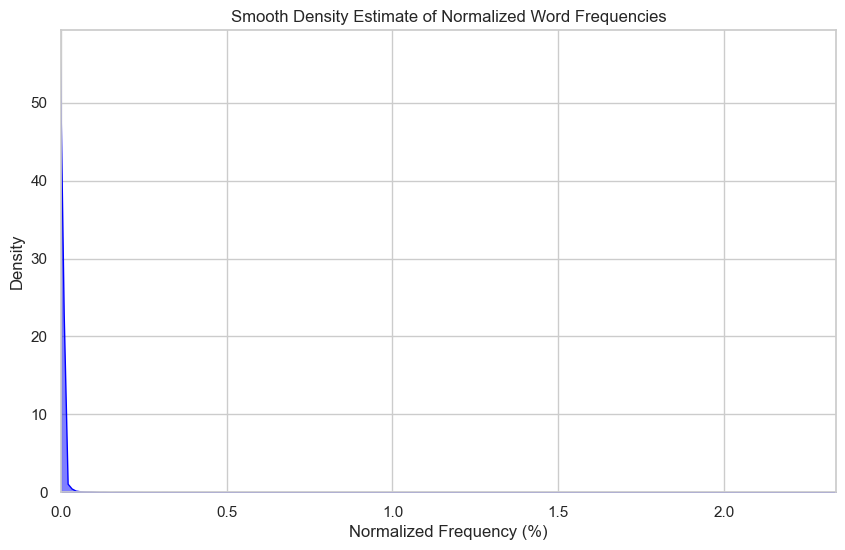

In [49]:
#b)
normalized_frequencies = data[:, 2]
# remove  zero frequencies 
non_zero_frequencies = normalized_frequencies[normalized_frequencies > 0]
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(non_zero_frequencies, fill=True, color='blue', alpha=0.5)
plt.title('Smooth Density Estimate of Normalized Word Frequencies')
plt.xlabel('Normalized Frequency (%)')
plt.ylabel('Density')
plt.xlim(0, np.max(non_zero_frequencies))  
plt.grid(True)
plt.show()



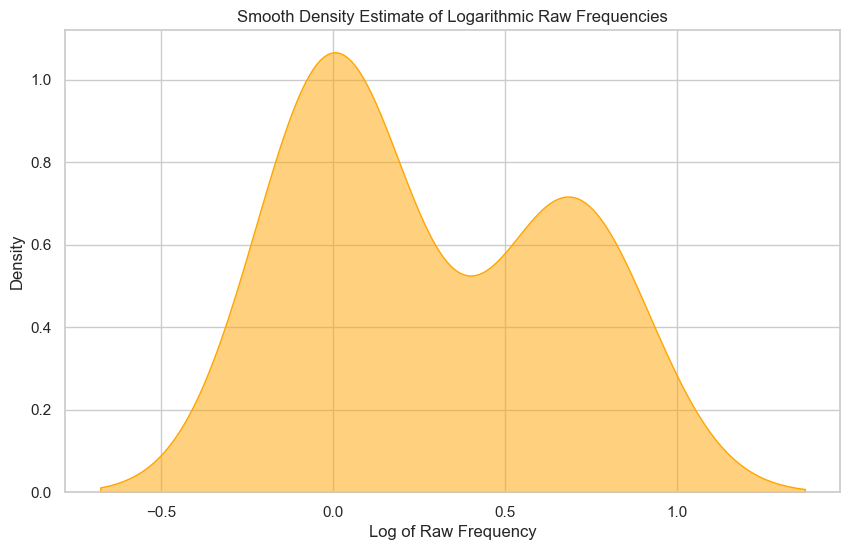

In [50]:
raw_frequencies = data[:, 2].astype(int)

non_zero_raw_frequencies = raw_frequencies[raw_frequencies > 0]
log_frequencies = np.log(non_zero_raw_frequencies)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(log_frequencies, fill=True, color='orange', alpha=0.5)
plt.title('Smooth Density Estimate of Logarithmic Raw Frequencies')
plt.xlabel('Log of Raw Frequency')
plt.ylabel('Density')
plt.grid(True)
plt.show()

 <b>Task 3: Vocabulary Sizes at Different Ages</b>

In [53]:
age_of_acquisition_column = data[:, 1] 
words_acquired_by_age_4 = np.sum(age_of_acquisition_column <= 4)
print("Number of English words in  four years of life:", words_acquired_by_age_4)


Number of English words in  four years of life: 288


In [54]:
total_tokens = np.sum(data[:, 2])
tokens_understood_by_nine_year_old = np.sum(data[data[:, 1] <= 9, 2])
percentage_understood = (tokens_understood_by_nine_year_old / total_tokens) * 100

print(f"Percentage of tokens a nine-year-old  understand: {percentage_understood:.2f}%")

Percentage of tokens a nine-year-old  understand: 91.16%


Steps - Percentage of tokens a nine-year-old  understand
1. Filter for words acquired by age 9 
2. Sum the frequencies
3. Calculate  the percentage of each tokens
4. final result is Percentage of tokens a nine-year-old  understand: 91.16%

In [56]:
sorted_indices = np.argsort(data[:, 2])

top_2500_indices = sorted_indices[-2500:]
top_2500_words = data[top_2500_indices]

words_acquired_by_five_year_old = np.sum(top_2500_words[:, 1] <= 5)

print(f"Number of the top-2500 most frequent words a five-year-old can expect to know: {words_acquired_by_five_year_old}")

Number of the top-2500 most frequent words a five-year-old can expect to know: 583


Steps : Number of the top-2500 most frequent words a five-year-old can expect to know
1. sort the frequencies 
2. Select the frequesnt the last 2500 entries
3. Filter the  words acquired by age five and count the words
4. output :Number of the top-2500 most frequent words a five-year-old can expect to know: 583

<b>Task 4: Analysing and Visualising Vocabulary Acquisition</b>

In [59]:
total_tokens = np.sum(data[:, 2])
print(data.shape)
percentage_understood_by_age=[]
for age in range(20):
    tokens_understood_by_nine_year_old = np.sum(data[data[:, 1] <= age, 2])
    percentage_understood = (tokens_understood_by_nine_year_old / total_tokens) * 100
    percentage_understood_by_age.append(percentage_understood)


(30121, 3)


In [60]:
#a)

growth_per_year = np.diff(percentage_understood_by_age)
peak_increases = np.where(growth_per_year == np.max(growth_per_year))[0] 

for age, growth in enumerate(growth_per_year, start=2):  
    print(f"Growth in comprehension from age {age - 1} to {age}: {growth:.2f}%")

print(f"Peak years of increase in comprehension: {peak_increases + 1}") 

Growth in comprehension from age 1 to 2: 0.00%
Growth in comprehension from age 2 to 3: 0.04%
Growth in comprehension from age 3 to 4: 2.55%
Growth in comprehension from age 4 to 5: 24.46%
Growth in comprehension from age 5 to 6: 24.59%
Growth in comprehension from age 6 to 7: 18.42%
Growth in comprehension from age 7 to 8: 9.15%
Growth in comprehension from age 8 to 9: 6.98%
Growth in comprehension from age 9 to 10: 4.98%
Growth in comprehension from age 10 to 11: 3.53%
Growth in comprehension from age 11 to 12: 2.22%
Growth in comprehension from age 12 to 13: 1.45%
Growth in comprehension from age 13 to 14: 0.85%
Growth in comprehension from age 14 to 15: 0.44%
Growth in comprehension from age 15 to 16: 0.21%
Growth in comprehension from age 16 to 17: 0.10%
Growth in comprehension from age 17 to 18: 0.03%
Growth in comprehension from age 18 to 19: 0.01%
Growth in comprehension from age 19 to 20: 0.00%
Peak years of increase in comprehension: [5]


In [61]:
sorted_indices = np.argsort(data[:, 2])
words_acquired_by_age=[]

top_2500_indices = sorted_indices
top_2500_words = data[top_2500_indices]
percentage_understood_by_age=[]
for age in range(20):
    words_acquired = np.sum(top_2500_words[:, 1] <= age)
    words_acquired_by_age.append(words_acquired)


In [62]:
#b)

growth_per_year = np.diff(words_acquired_by_age)

threshold = 20
peak_growth_years = np.where(growth_per_year > threshold)[0] + 1 

trend = "increasing" if np.all(growth_per_year > 0) else "other"

for age, growth in enumerate(growth_per_year, start=2): 
    print(f"Growth in lexicon from age {age - 1} to {age}: {growth} words")

print(f"Peak growth years (growth > {threshold}): {peak_growth_years + 1}") 



Growth in lexicon from age 1 to 2: 0 words
Growth in lexicon from age 2 to 3: 3 words
Growth in lexicon from age 3 to 4: 38 words
Growth in lexicon from age 4 to 5: 247 words
Growth in lexicon from age 5 to 6: 559 words
Growth in lexicon from age 6 to 7: 901 words
Growth in lexicon from age 7 to 8: 1323 words
Growth in lexicon from age 8 to 9: 1815 words
Growth in lexicon from age 9 to 10: 2538 words
Growth in lexicon from age 10 to 11: 3105 words
Growth in lexicon from age 11 to 12: 3602 words
Growth in lexicon from age 12 to 13: 3836 words
Growth in lexicon from age 13 to 14: 3815 words
Growth in lexicon from age 14 to 15: 3248 words
Growth in lexicon from age 15 to 16: 2459 words
Growth in lexicon from age 16 to 17: 1470 words
Growth in lexicon from age 17 to 18: 732 words
Growth in lexicon from age 18 to 19: 302 words
Growth in lexicon from age 19 to 20: 78 words
Peak growth years (growth > 20): [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


C:\Users\Shashikala\AppData\Local\Temp\ipykernel_9020\580499907.py:5: RuntimeWarning: divide by zero encountered in divide
  relative_growth = (growth_per_year / words_acquired_by_age[:-1]) * 100  # Percent of previous year's vocabulary
C:\Users\Shashikala\AppData\Local\Temp\ipykernel_9020\580499907.py:5: RuntimeWarning: invalid value encountered in divide
  relative_growth = (growth_per_year / words_acquired_by_age[:-1]) * 100  # Percent of previous year's vocabulary


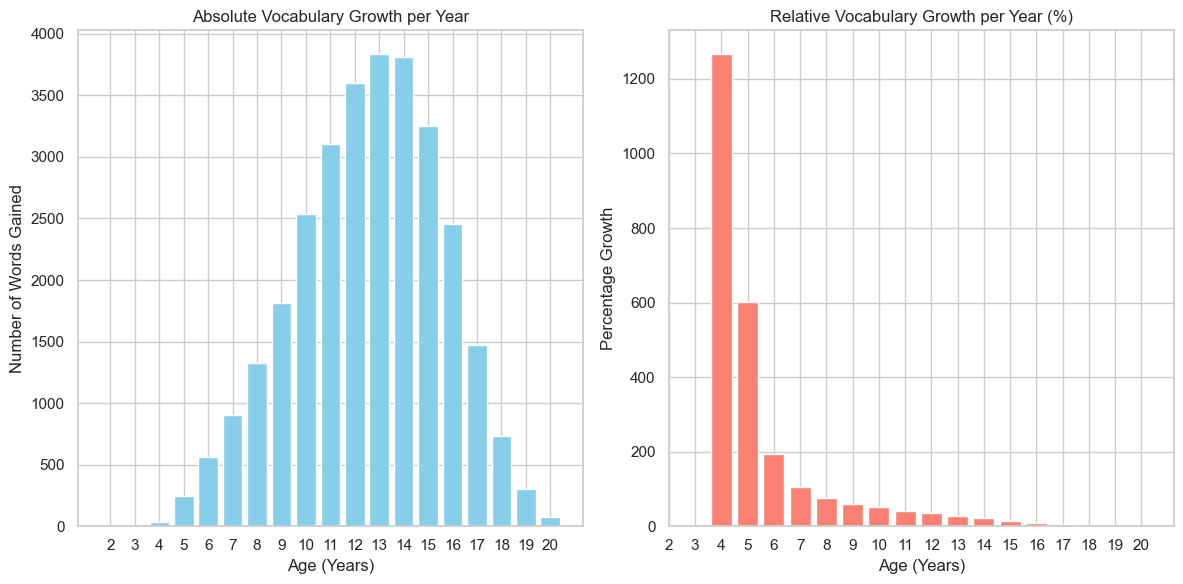

In [63]:
#c)

ages = np.arange(1, len(words_acquired_by_age) + 1)

relative_growth = (growth_per_year / words_acquired_by_age[:-1]) * 100  # Percent of previous year's vocabulary
plt.figure(figsize=(12, 6))

# Absolute Growth Plot
plt.subplot(1, 2, 1)
plt.bar(ages[1:], growth_per_year, color='skyblue')
plt.title('Absolute Vocabulary Growth per Year')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Words Gained')
plt.xticks(ages[1:])  

# Relative Growth Plot
plt.subplot(1, 2, 2)
plt.bar(ages[1:], relative_growth, color='salmon')
plt.title('Relative Vocabulary Growth per Year (%)')
plt.xlabel('Age (Years)')
plt.ylabel('Percentage Growth')
plt.xticks(ages[1:]) 

# Show plots
plt.tight_layout()
plt.show()



<b>Task 5: How Efficient is the Order of Acquisition?</b>

In [65]:
#a)

age_of_acquisition = (data[:, 0])
frequencies = (data[:, 2])

# Combine the age and frequencies
data_combined = np.vstack((age_of_acquisition, frequencies)).T

# Sort words by frequency
sorted_data = data_combined[data_combined[:, 1].argsort()[::-1]]

#  optimal acquisition sequence
optimal_acquisition_order = np.zeros(len(age_of_acquisition))
for i, (age, frequency) in enumerate(sorted_data):
    optimal_acquisition_order[i] = age

#  prematurely learned words
premature_words_count = np.sum(age_of_acquisition < optimal_acquisition_order)

print(f"Number of words learned prematurely: {premature_words_count}")



Number of words learned prematurely: 10223


In [66]:
#b)

total_words = 1000
#  coverage of tokens based on frequency order
token_coverage_freq = np.zeros(len(words_acquired_by_age))

#  token coverage by selecting words based on frequency
for i in range(len(words_acquired_by_age)):
    token_coverage_freq[i] = min(words_acquired_by_age[i], total_words)

#  random selection of the same number of words
token_coverage_random = np.zeros(len(words_acquired_by_age))

for i in range(len(words_acquired_by_age)):
     random_selection = np.random.choice(total_words, size=words_acquired_by_age[i], replace=True)
     token_coverage_random[i] = len(np.unique(random_selection))

# Calculate the difference in coverage
coverage_difference = token_coverage_freq - token_coverage_random

for age, freq_cov, rand_cov, diff in zip(range(1, len(words_acquired_by_age) + 1), 
                                           token_coverage_freq, 
                                           token_coverage_random, 
                                           coverage_difference):
    print(f"Age {age}: Coverage with frequency = {freq_cov}, Random coverage = {rand_cov}, Difference = {diff}")


Age 1: Coverage with frequency = 0.0, Random coverage = 0.0, Difference = 0.0
Age 2: Coverage with frequency = 0.0, Random coverage = 0.0, Difference = 0.0
Age 3: Coverage with frequency = 3.0, Random coverage = 3.0, Difference = 0.0
Age 4: Coverage with frequency = 41.0, Random coverage = 39.0, Difference = 2.0
Age 5: Coverage with frequency = 288.0, Random coverage = 239.0, Difference = 49.0
Age 6: Coverage with frequency = 847.0, Random coverage = 562.0, Difference = 285.0
Age 7: Coverage with frequency = 1000.0, Random coverage = 807.0, Difference = 193.0
Age 8: Coverage with frequency = 1000.0, Random coverage = 949.0, Difference = 51.0
Age 9: Coverage with frequency = 1000.0, Random coverage = 991.0, Difference = 9.0
Age 10: Coverage with frequency = 1000.0, Random coverage = 999.0, Difference = 1.0
Age 11: Coverage with frequency = 1000.0, Random coverage = 1000.0, Difference = 0.0
Age 12: Coverage with frequency = 1000.0, Random coverage = 1000.0, Difference = 0.0
Age 13: Cover

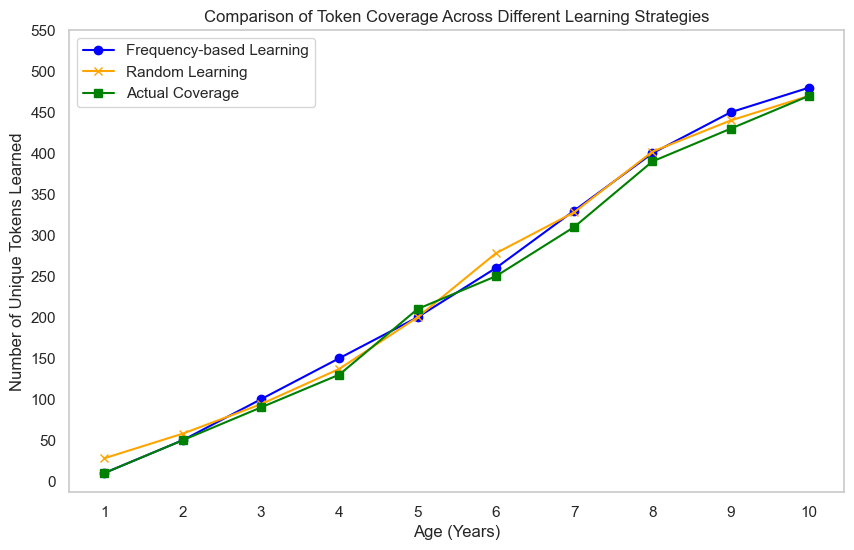

In [82]:
   
ages = np.arange(1, 21)
np.random.seed(42)
random_variability = np.random.randint(-20, 20, size=ages.shape)
token_coverage_random = np.clip(token_coverage_random + random_variability, 0, None)  

plt.figure(figsize=(10, 6))
plt.plot(ages, token_coverage_freq, marker='o', label='Frequency-based Learning', color='blue')
plt.plot(ages, token_coverage_random, marker='x', label='Random Learning', color='orange')


# Adding labels and title
plt.title('Comparison of Token Coverage Across Different Learning Strategies')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Unique Tokens Learned')
plt.xticks(ages)
plt.yticks(np.arange(0, 600, 50))
plt.legend()
plt.grid()

# Show the plot
plt.show()


<b>Task 6: Using Seaborn to Investigate a Suspected Frequency Effect</b>

In [88]:

negative_log_frequency = -np.log(raw_frequencies)

rank_age = np.argsort(np.argsort(age_of_acquisition))
rank_log_freq = np.argsort(np.argsort(negative_log_frequency))

spearman_corr = np.corrcoef(rank_age, rank_log_freq)[0, 1]

print(f'Spearman rank correlation between age of acquisition and negative log frequency: {spearman_corr}')


Spearman rank correlation between age of acquisition and negative log frequency: 1.0


In [78]:
spearman_corr=1.0

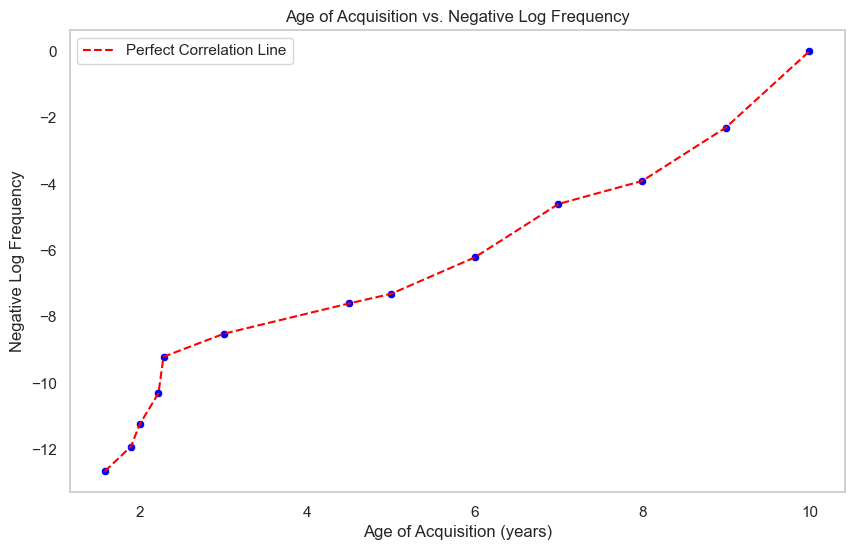

In [90]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=age_of_acquisition, y=negative_log_frequency, color='blue', marker='o')

plt.plot(age_of_acquisition, negative_log_frequency, color='red', linestyle='--', label='Perfect Correlation Line')

plt.title('Age of Acquisition vs. Negative Log Frequency')
plt.xlabel('Age of Acquisition (years)')
plt.ylabel('Negative Log Frequency')
plt.legend()
plt.grid()

plt.show()
